<a href="https://colab.research.google.com/github/AyeshaAnzerBCIT/Multisource/blob/main/EEG_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install PyTorch Geometric dependencies
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.0.0+cpu.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.0.0+cpu.html
!pip install torch-geometric


/bin/bash: /home/ayesha/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cpu.html
/bin/bash: /home/ayesha/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cpu.html
/bin/bash: /home/ayesha/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


?? Sampling 10000 rows from EEG CSV...
? Loaded shape: (10000, 12)

?? Data Summary:
                   count       mean        std        min        25%  \
mean_rt            319.0  86.984326   0.822104  86.000000  86.000000   
std_rt             319.0   0.000000   0.000000   0.000000   0.000000   
median_rt          319.0  86.984326   0.822104  86.000000  86.000000   
min_rt             319.0  86.984326   0.822104  86.000000  86.000000   
max_rt             319.0  86.984326   0.822104  86.000000  86.000000   
accuracy           319.0  46.107843  14.675446   3.557312  36.000000   
Mobility          9681.0   0.185306   0.078937   0.054897   0.121285   
Complexity        9681.0   2.556722   1.078075   0.968283   1.681530   
Spectral_Entropy  9681.0   2.128901   0.582144   0.639815   1.699629   

                        50%        75%        max  
mean_rt           87.000000  88.000000  88.000000  
std_rt             0.000000   0.000000   0.000000  
median_rt         87.000000  88.000000

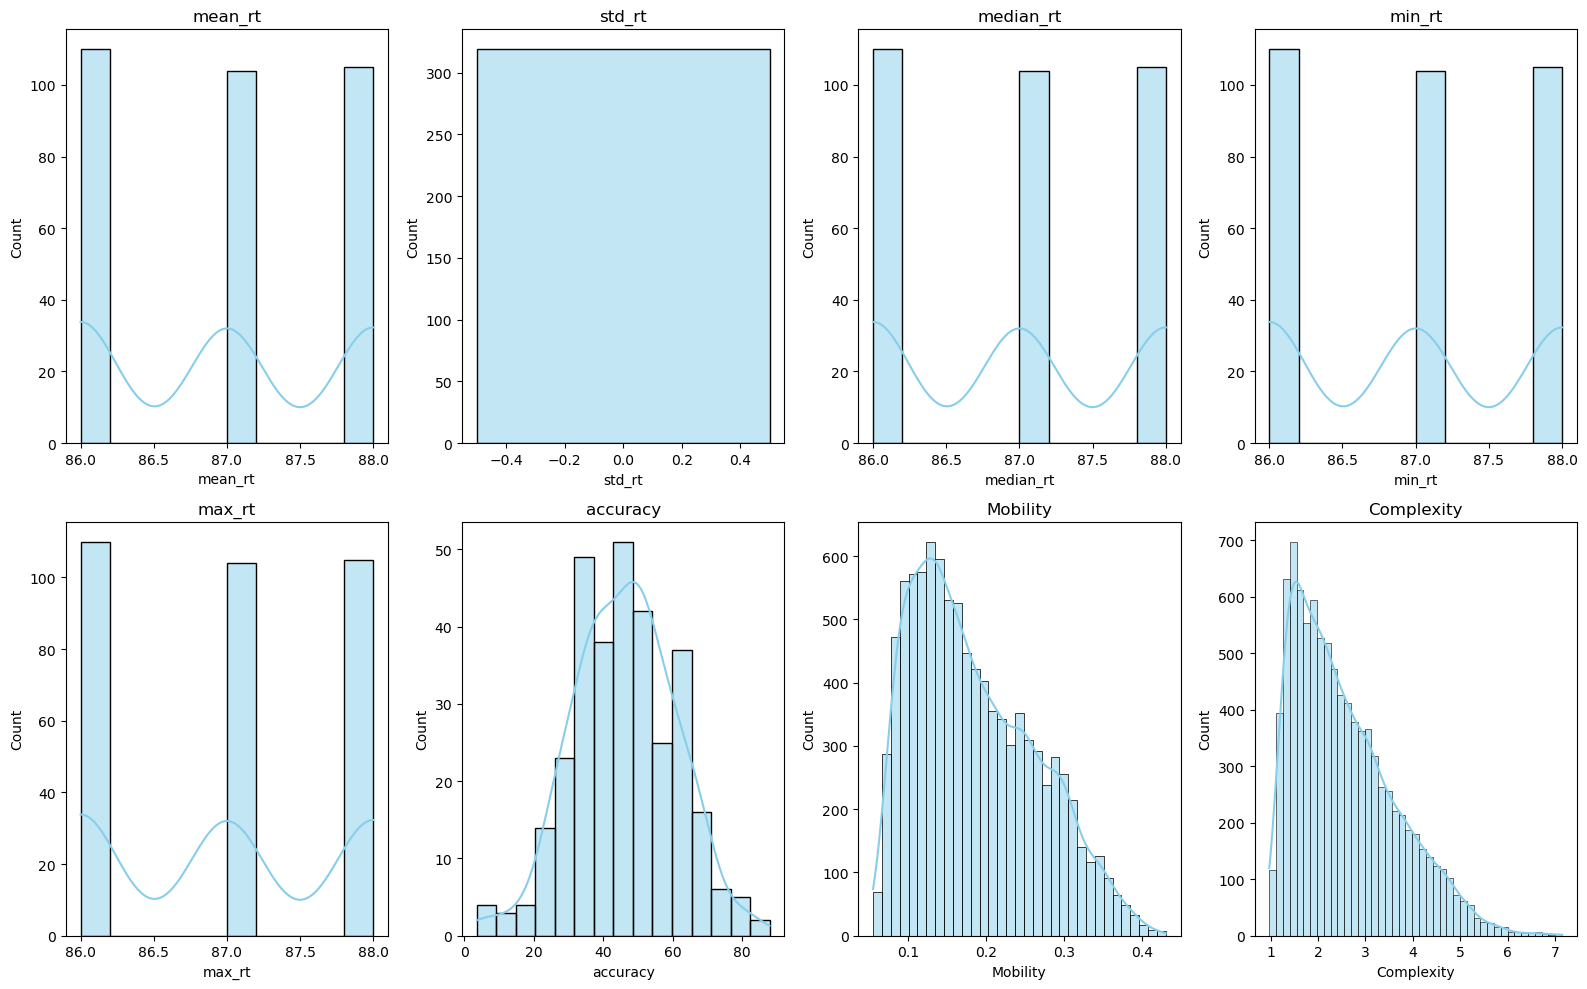

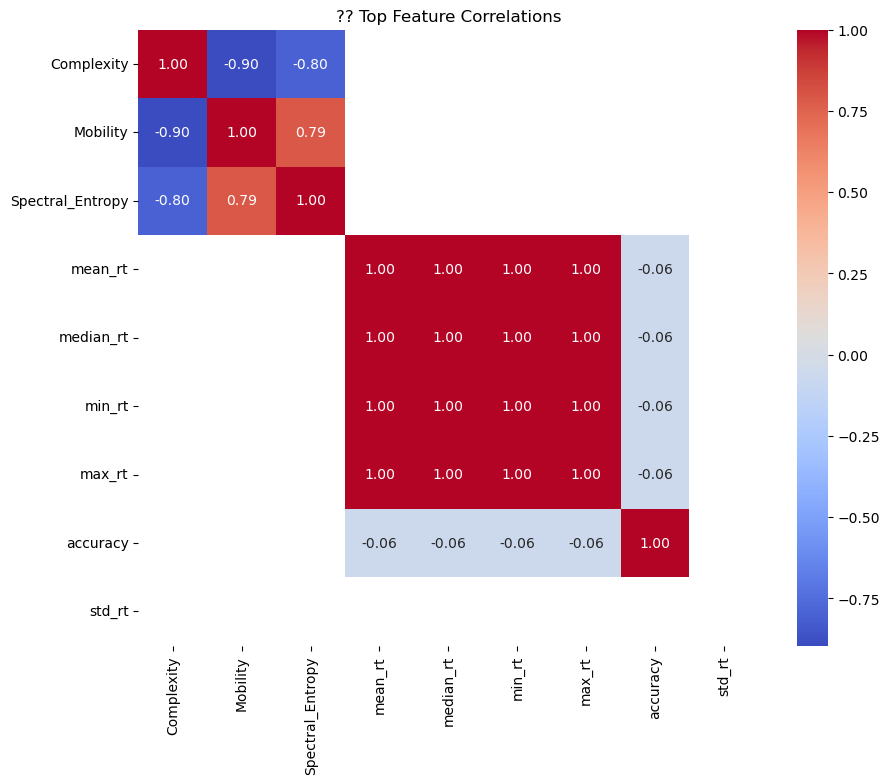

?? Sampling 10000 rows from EEG CSV...
? Loaded shape: (10000, 12)

?? Data Summary:
                   count       mean        std        min        25%  \
mean_rt            319.0  86.984326   0.822104  86.000000  86.000000   
std_rt             319.0   0.000000   0.000000   0.000000   0.000000   
median_rt          319.0  86.984326   0.822104  86.000000  86.000000   
min_rt             319.0  86.984326   0.822104  86.000000  86.000000   
max_rt             319.0  86.984326   0.822104  86.000000  86.000000   
accuracy           319.0  46.107843  14.675446   3.557312  36.000000   
Mobility          9681.0   0.185306   0.078937   0.054897   0.121285   
Complexity        9681.0   2.556722   1.078075   0.968283   1.681530   
Spectral_Entropy  9681.0   2.128901   0.582144   0.639815   1.699629   

                        50%        75%        max  
mean_rt           87.000000  88.000000  88.000000  
std_rt             0.000000   0.000000   0.000000  
median_rt         87.000000  88.000000

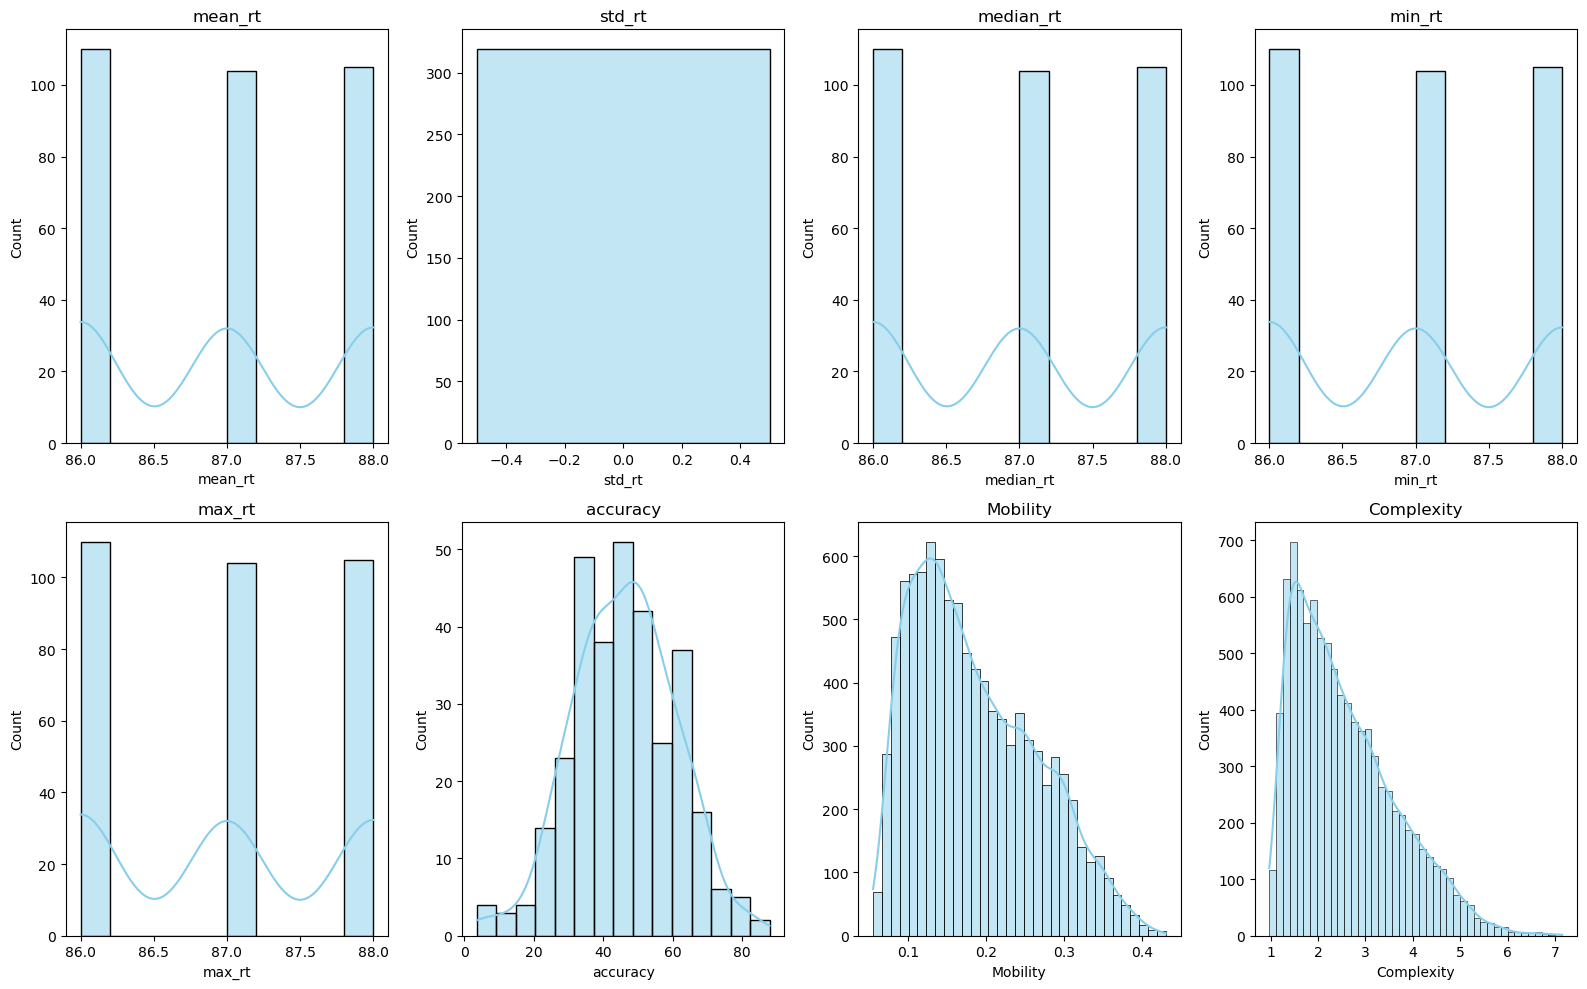

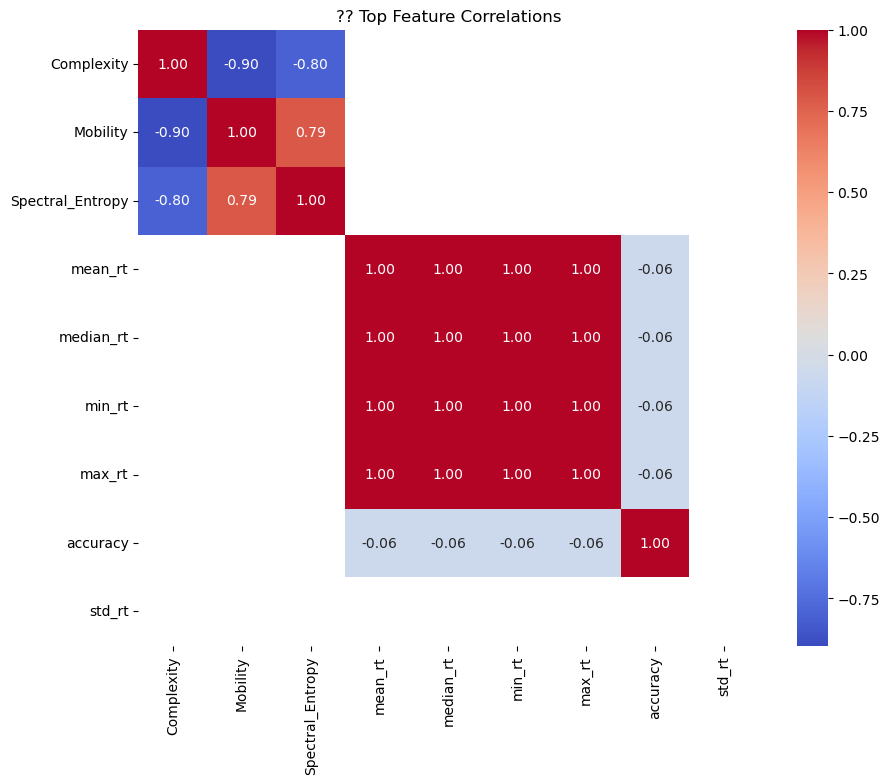

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gcsfs

# -------------------------------
# CONFIG
# -------------------------------
FILE_PATH = "gs://eegchild/processed_features/merged_features.csv"
KEY_PATH = "Key.json"
SAMPLE_ROWS = 10000  # You can change this based on memory
fs = gcsfs.GCSFileSystem(token=KEY_PATH)

# -------------------------------
# LOAD SAMPLE
# -------------------------------
def load_sample(file_path, sample_rows=10000):
    print(f"?? Sampling {sample_rows} rows from EEG CSV...")
    with fs.open(file_path, 'r') as f:
        df = pd.read_csv(f, low_memory=False, nrows=sample_rows)
    print(f"? Loaded shape: {df.shape}")
    return df

df_sample = load_sample(FILE_PATH, SAMPLE_ROWS)

# -------------------------------
# QUICK SUMMARY
# -------------------------------
print("\n?? Data Summary:")
print(df_sample.describe().T)

print("\n?? Missing Values:")
print(df_sample.isnull().sum().sort_values(ascending=False))

# -------------------------------
# Distribution Plots (Faster)
# -------------------------------
def plot_quick_distributions(df, max_features=8):
    numeric_cols = df.select_dtypes(include='number').columns[:max_features]
    plt.figure(figsize=(16, 10))

    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(2, 4, i)
        sns.histplot(df[col], kde=True, color="skyblue")
        plt.title(col)

    plt.tight_layout()
    plt.show()

plot_quick_distributions(df_sample)

# -------------------------------
# Correlation Heatmap (Faster)
# -------------------------------
def quick_correlation(df, top_n=15):
    numeric_df = df.select_dtypes(include='number')
    corr = numeric_df.corr().abs()

    # Focus only on top N variables
    top_corr_cols = corr.mean().sort_values(ascending=False).head(top_n).index
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df[top_corr_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("?? Top Feature Correlations")
    plt.show()

quick_correlation(df_sample)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gcsfs

# -------------------------------
# CONFIG
# -------------------------------
FILE_PATH = "gs://eegchild/processed_features/merged_features.csv"
KEY_PATH = "Key.json"
SAMPLE_ROWS = 10000  # You can change this based on memory
fs = gcsfs.GCSFileSystem(token=KEY_PATH)

# -------------------------------
# LOAD SAMPLE
# -------------------------------
def load_sample(file_path, sample_rows=10000):
    print(f"?? Sampling {sample_rows} rows from EEG CSV...")
    with fs.open(file_path, 'r') as f:
        df = pd.read_csv(f, low_memory=False, nrows=sample_rows)
    print(f"? Loaded shape: {df.shape}")
    return df

df_sample = load_sample(FILE_PATH, SAMPLE_ROWS)

# -------------------------------
# QUICK SUMMARY
# -------------------------------
print("\n?? Data Summary:")
print(df_sample.describe().T)

print("\n?? Missing Values:")
print(df_sample.isnull().sum().sort_values(ascending=False))

# -------------------------------
# Distribution Plots (Faster)
# -------------------------------
def plot_quick_distributions(df, max_features=8):
    numeric_cols = df.select_dtypes(include='number').columns[:max_features]
    plt.figure(figsize=(16, 10))

    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(2, 4, i)
        sns.histplot(df[col], kde=True, color="skyblue")
        plt.title(col)

    plt.tight_layout()
    plt.show()

plot_quick_distributions(df_sample)

# -------------------------------
# Correlation Heatmap (Faster)
# -------------------------------
def quick_correlation(df, top_n=15):
    numeric_df = df.select_dtypes(include='number')
    corr = numeric_df.corr().abs()

    # Focus only on top N variables
    top_corr_cols = corr.mean().sort_values(ascending=False).head(top_n).index
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df[top_corr_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("?? Top Feature Correlations")
    plt.show()

quick_correlation(df_sample)


?? EEG Pipeline Start
[1/6] ? Loading EEG data from GCS...
    ?? Loaded 435772691 rows
    ?? Aggregated 1386 patients using features: ['Mobility', 'Complexity', 'Spectral_Entropy']
[2/6] ? Standardizing...
    ?? Standardized shape: (1386, 3)
[3/6] ? Applying PCA...
    ?? PCA shape: (1386, 3)
[4/6] ? Clustering...
    ?? Clustering done
[5/6] ?? Training GNN...


GNN Epochs: 100%|███████████████████████████████| 30/30 [00:00<00:00, 35.73it/s]


    ?? GNN Training Complete
[6/6] ?? Evaluating Clusters...
                   Silhouette  Davies-Bouldin  Calinski-Harabasz
KMeans_Cluster       0.436480        0.751018        1789.970105
Spectral_Cluster     0.637036        0.347695         705.885913
GMM_Cluster          0.600595        0.516864        1002.550221
Hybrid_GNN_KMeans    0.023240        1.972243         213.234582


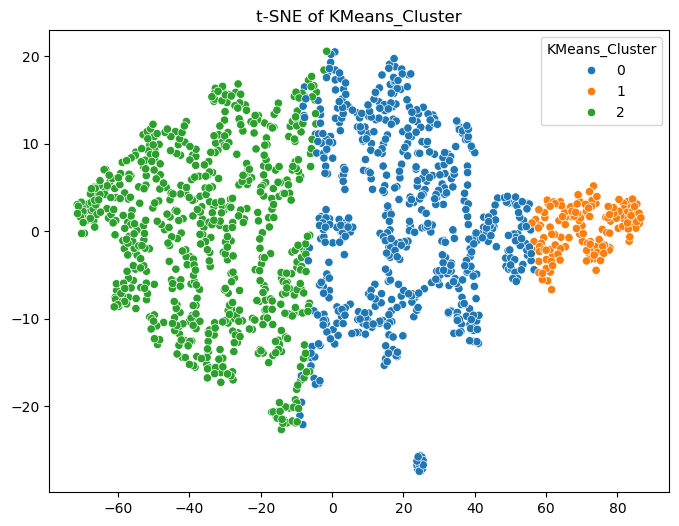

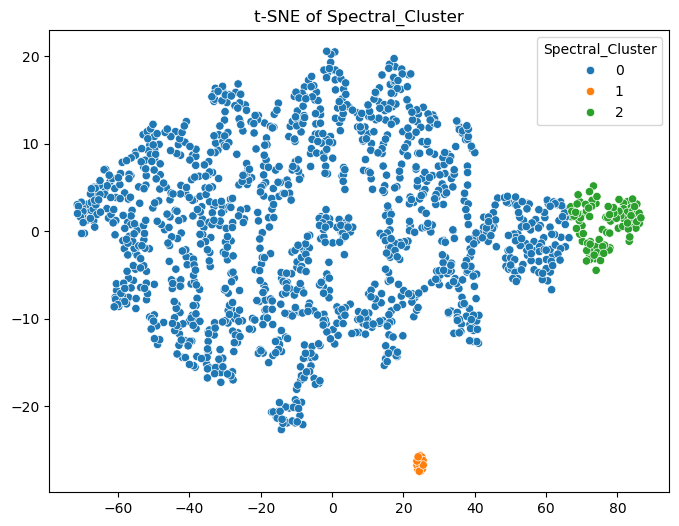

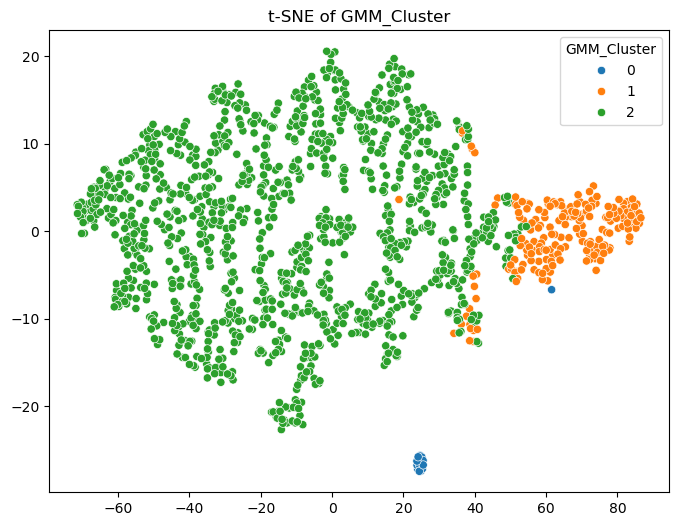

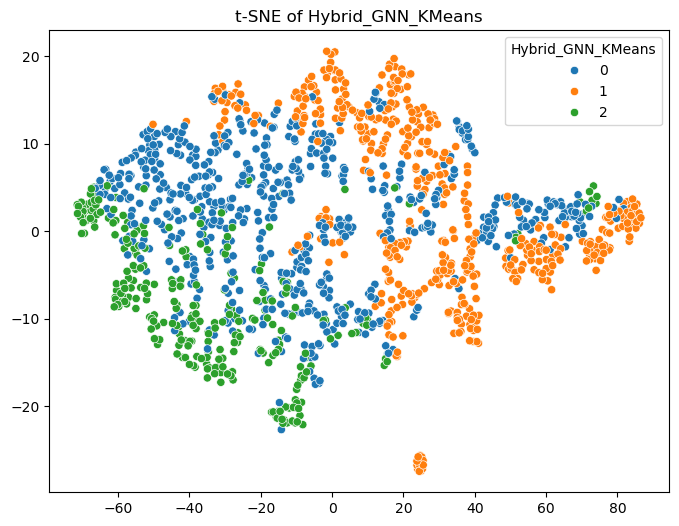

? EEG Pipeline Done.


In [ ]:
# EEG Clustering Pipeline (Patient-level Aggregation, PCA Fixes)

import os, re, time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.manifold import TSNE
from sklearn.neighbors import kneighbors_graph
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.nn import GCNConv
from tqdm import tqdm
import gcsfs

# CONFIG
k_fixed = 3
KEY_PATH = "Key.json"
GCS_PATH = "gs://eegchild/processed_features/merged_features.csv"

# Helper: Extract patient ID
def extract_patient_id(x):
    match = re.findall(r'(A\d+)', str(x))
    return match[0] if match else None

# Load & Aggregate
def load_and_aggregate(file_path):
    print("[1/6] ? Loading EEG data from GCS...")
    fs = gcsfs.GCSFileSystem(token=KEY_PATH)
    with fs.open(file_path, 'r') as f:
        df = pd.read_csv(f, low_memory=False)
    print(f"    ?? Loaded {len(df)} rows")

    # Patient ID extraction
    if 'file_name' in df.columns:
        df['patient_id'] = df['file_name'].apply(extract_patient_id)
    elif 'file' in df.columns:
        df['patient_id'] = df['file'].apply(extract_patient_id)
    df = df[df['patient_id'].notna()]

    # Filter & aggregate only required features
    features = ['Mobility', 'Complexity', 'Spectral_Entropy']
    df_agg = df.groupby('patient_id')[features].mean().dropna().reset_index()
    print(f"    ?? Aggregated {len(df_agg)} patients using features: {features}")
    return df_agg

# Standardize
def standardize_features(df):
    print("[2/6] ? Standardizing...")
    numeric_df = df.select_dtypes(include='number').dropna()
    if len(numeric_df) == 0:
        raise ValueError("? No usable numeric data.")
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(numeric_df)
    print(f"    ?? Standardized shape: {X_scaled.shape}")
    return X_scaled, numeric_df

# Dimensionality Reduction (auto fix if n_components too large)
def reduce_dimensions(X, max_components=20):
    print("[3/6] ? Applying PCA...")
    n_components = min(max_components, X.shape[1], X.shape[0])
    if n_components < 1:
        raise ValueError("? Insufficient data for PCA.")
    pca = PCA(n_components=n_components, random_state=42)
    X_reduced = pca.fit_transform(X)
    print(f"    ?? PCA shape: {X_reduced.shape}")
    return X_reduced

# Clustering
def perform_clustering(df, X, k=3):
    print("[4/6] ? Clustering...")
    df = df.iloc[:X.shape[0]].copy()
    df["KMeans_Cluster"] = KMeans(n_clusters=k, random_state=42).fit_predict(X)
    df["Spectral_Cluster"] = SpectralClustering(n_clusters=k, random_state=42).fit_predict(X)
    df["GMM_Cluster"] = GaussianMixture(n_components=k, random_state=42).fit_predict(X)
    print("    ?? Clustering done")
    return df

# GNN Model
class GNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)
    def forward(self, x, edge_index):
        x = torch.relu(self.conv1(x, edge_index))
        return self.conv2(x, edge_index)

def build_knn_graph(X, k=3):
    adj = kneighbors_graph(X, k, mode='connectivity', include_self=True)
    return torch.tensor(np.array(adj.nonzero()), dtype=torch.long)

def train_gnn(X, edge_index, hidden_dim=8, output_dim=2, epochs=30):
    print("[5/6] ?? Training GNN...")
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = GNNModel(X.shape[1], hidden_dim, output_dim).to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    X_tensor = torch.tensor(X, dtype=torch.float).to(device)
    edge_index = edge_index.to(device)
    for _ in tqdm(range(epochs), desc="GNN Epochs"):
        model.train()
        optimizer.zero_grad()
        embeddings = model(X_tensor, edge_index)
        loss = torch.mean(embeddings ** 2)
        loss.backward()
        optimizer.step()
    print("    ?? GNN Training Complete")
    return embeddings.detach().cpu().numpy()

# Evaluate
def evaluate_clustering(df, X):
    print("[6/6] ?? Evaluating Clusters...")
    metrics = {}
    for col in ["KMeans_Cluster", "Spectral_Cluster", "GMM_Cluster", "Hybrid_GNN_KMeans"]:
        if col in df.columns:
            metrics[col] = {
                "Silhouette": silhouette_score(X, df[col]),
                "Davies-Bouldin": davies_bouldin_score(X, df[col]),
                "Calinski-Harabasz": calinski_harabasz_score(X, df[col])
            }
    print(pd.DataFrame(metrics).T)

# t-SNE Plot
def visualize_clusters_tsne(X, labels, title):
    tsne = TSNE(n_components=2, random_state=42)
    X_embedded = tsne.fit_transform(X)
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=labels, palette="tab10")
    plt.title(f"t-SNE of {title}")
    plt.show()

# MAIN
print("?? EEG Pipeline Start")
df = load_and_aggregate(GCS_PATH)
X_scaled, _ = standardize_features(df)
X_reduced = reduce_dimensions(X_scaled)

df = perform_clustering(df, X_reduced, k_fixed)
edge_index = build_knn_graph(X_reduced, k=3)
embeddings = train_gnn(X_reduced, edge_index)
df["Hybrid_GNN_KMeans"] = KMeans(n_clusters=k_fixed).fit_predict(embeddings)

evaluate_clustering(df, X_reduced)

for method in ["KMeans_Cluster", "Spectral_Cluster", "GMM_Cluster", "Hybrid_GNN_KMeans"]:
    visualize_clusters_tsne(X_reduced, df[method], method)

print("? EEG Pipeline Done.")
